In [1]:
import pandas as pd
import numpy as np

In [2]:
air = pd.read_csv("C:\\Users\\dakha\\Downloads\\AirPassengers.csv" ,parse_dates=['Month'])

In [3]:
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller , acf, pacf
from statsmodels.tsa.arima_model import ARIMA, ARMA 
import math
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import warnings
warnings.filterwarnings('ignore')

In [4]:
air.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
air.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
air.shape

(144, 2)

In [8]:
air.tail()

,Month,#Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [11]:
#air['Month'] = air['Month'].apply(lambda x: dt(int(x[0:4]), int(x[5:]), 1))
#air.info()

In [12]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [13]:
air.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
n1 =dt.now()
n1.strftime('%A,%d/%m/%y')

'Wednesday,02/03/22'

In [15]:
air = air.set_index('Month')

In [16]:
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
air.tz_localize(tz="Asia/Kolkata").head()

,#Passengers
Month,
1949-01-01 00:00:00+05:30,112
1949-02-01 00:00:00+05:30,118
1949-03-01 00:00:00+05:30,132
1949-04-01 00:00:00+05:30,129
1949-05-01 00:00:00+05:30,121


In [18]:
 air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
ts = air['#Passengers']

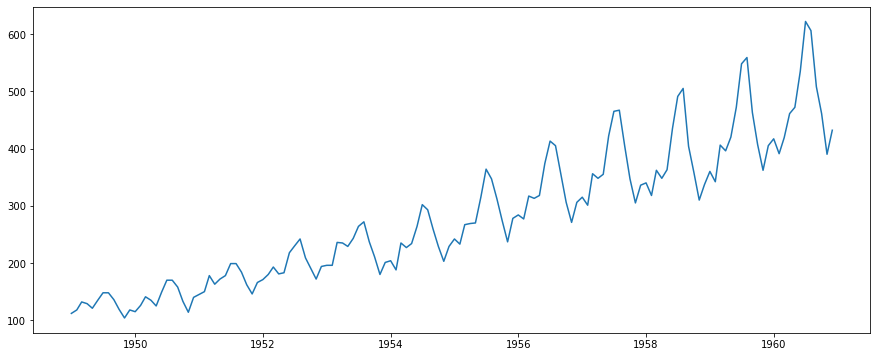

In [20]:
plt.plot(ts)

observe seasonality of the data

In [21]:
def test_seasonaltiy(timeseries):
    
    #determining rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()
    
    #plot rolling statistics:
    orig = plt.plot(timeseries,color='blue', label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd, color='Black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test :
    print('Result of Dicky fuller test:')
    
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics', 'p-value','#Lags Used','No of Observation Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

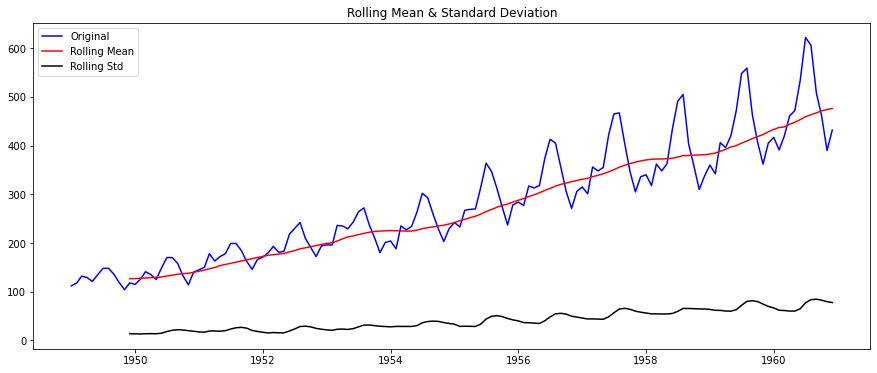

Result of Dicky fuller test:
Test Statistics             0.815369
p-value                     0.991880
#Lags Used                 13.000000
No of Observation Used    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


In [22]:
test_seasonaltiy(air['#Passengers'])

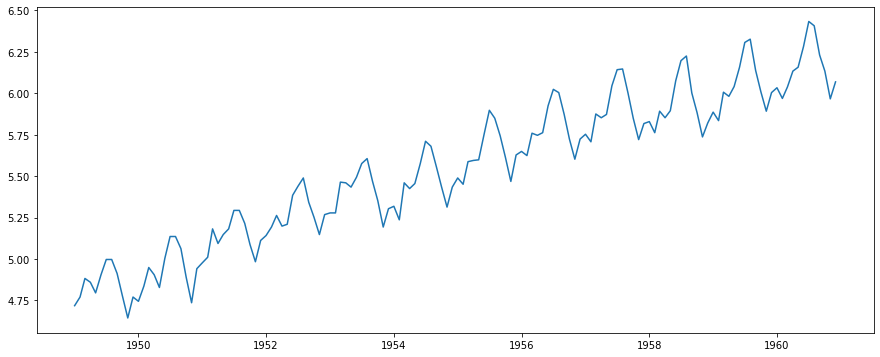

In [23]:
# transformation 
ts_log = np.log(ts)
plt.plot(ts_log)

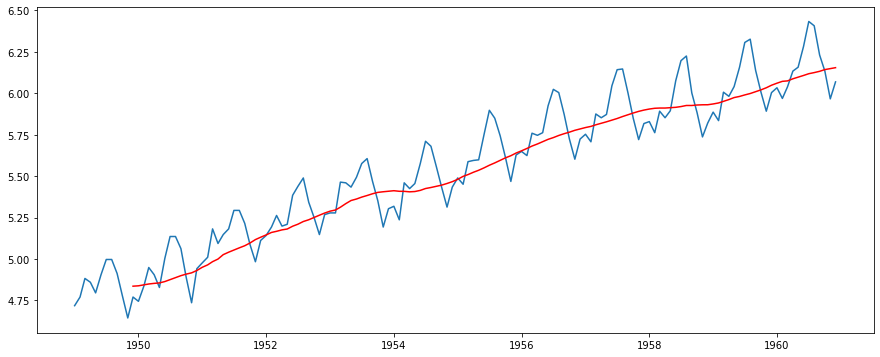

In [24]:
moving_average = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(moving_average, color = 'red')

In [25]:
ts_log_diff = ts_log - moving_average
ts_log_diff.head(12)

# remove NaN values 
ts_log_diff.dropna(inplace = True)
ts_log_diff.head(10)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
Name: #Passengers, dtype: float64

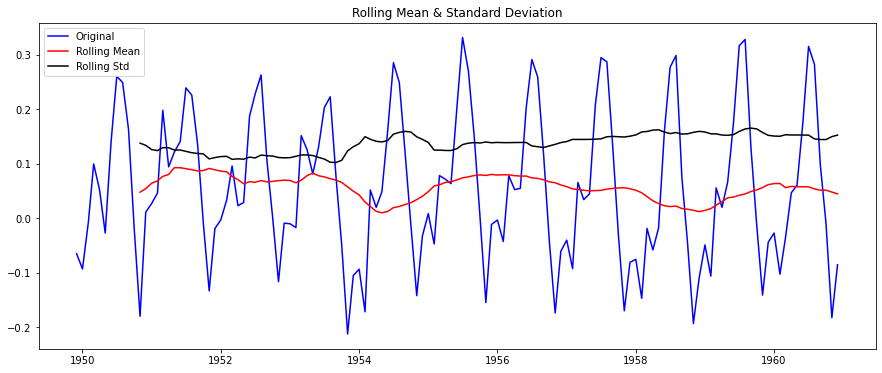

Result of Dicky fuller test:
Test Statistics            -3.162908
p-value                     0.022235
#Lags Used                 13.000000
No of Observation Used    119.000000
Critical Value (1%)        -3.486535
Critical Value (5%)        -2.886151
Critical Value (10%)       -2.579896
dtype: float64


In [26]:
test_seasonaltiy(ts_log_diff)

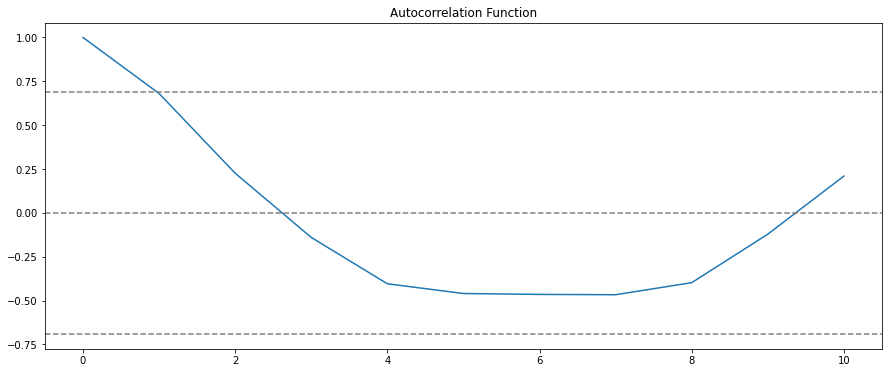

In [27]:
plt.plot(np.arange(0,11), acf(ts_log_diff, nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)),linestyle='--',color = 'gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

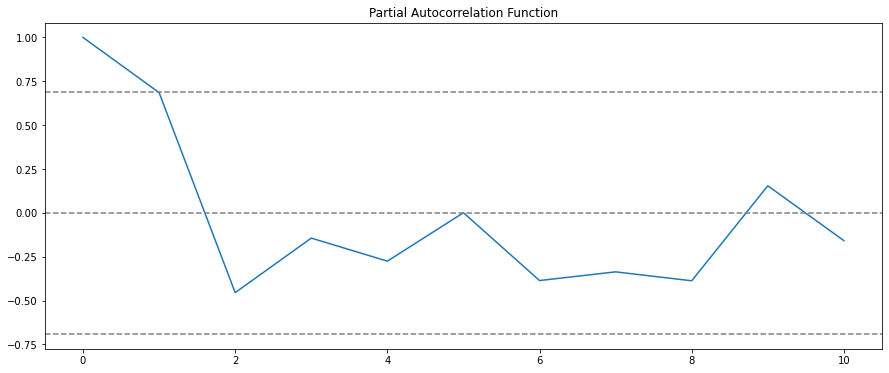

In [28]:
plt.plot(np.arange(0,11),pacf(ts_log_diff,nlags =10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

The PACF curves drops to 0 between lag value 1 and 2. Thus, optimal value of p in the ARIMA model is 1 or 2. 

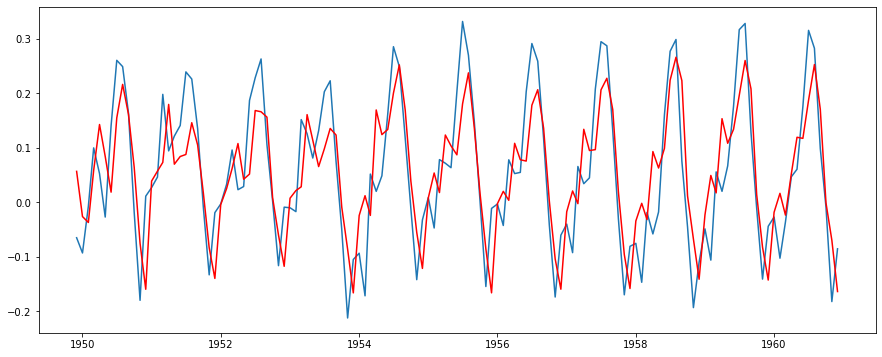

In [29]:
# build the ARMA model 
model = ARMA(ts_log_diff,order=(2,1))
results_ARIMA = model.fit()

plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues , color='red')

In [30]:
results_ARIMA.fittedvalues

Month
1949-12-01    0.056350
1950-01-01   -0.026639
1950-02-01   -0.037448
1950-03-01    0.058066
1950-04-01    0.142335
                ...   
1960-08-01    0.252449
1960-09-01    0.170315
1960-10-01   -0.001507
1960-11-01   -0.070034
1960-12-01   -0.164257
Length: 133, dtype: float64

In [31]:
air.head(12)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [32]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  133
Model:                     ARMA(2, 1)   Log Likelihood                 144.619
Method:                       css-mle   S.D. of innovations              0.081
Date:                Wed, 02 Mar 2022   AIC                           -279.238
Time:                        16:13:56   BIC                           -264.786
Sample:                    12-01-1949   HQIC                          -273.365
                         - 12-01-1960                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0564      0.005     10.547      0.000       0.046       0.067
ar.L1.#Passengers     1.5157      0.057     26.753      0.000       1.405       1.627
ar.L2.#Passengers    -0.7912      0.051    -15.408      0.000      -0.892      -0.691
ma.L1.#Passengers    -0.7974      0.057    -13.963      0.000      -0.909      -0.685
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9579           -0.5885j            1.1242           -0.0877
AR.2            0.9579           +0.5885j            1.1242            0.0877
MA.1            1.2541           +0.0000j            1.2541            0.0000
-----------------------------------------------------------------------------
"""

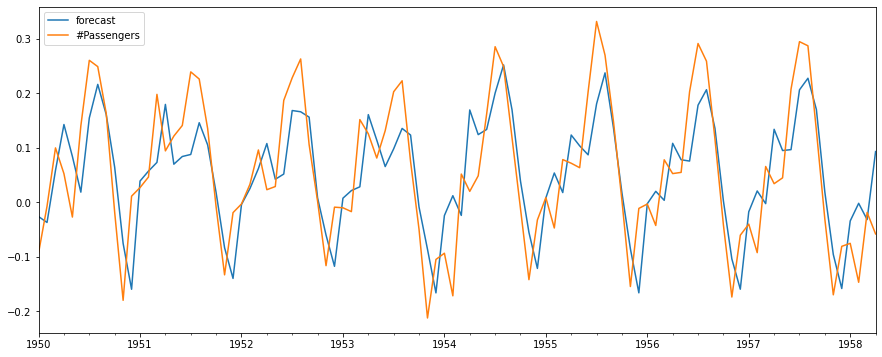

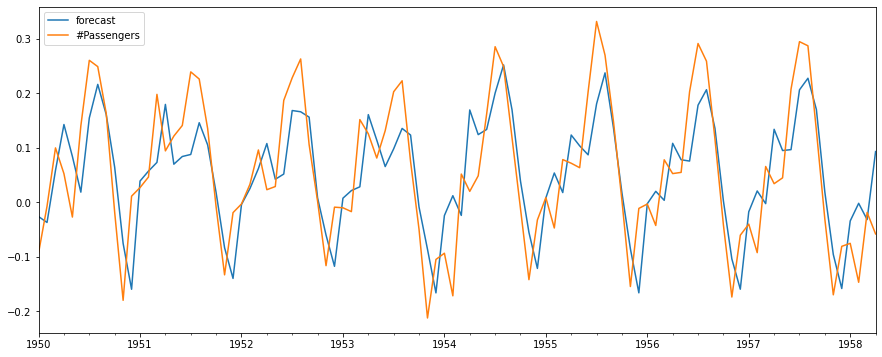

In [33]:
results_ARIMA.plot_predict(1,100)

In [34]:
# lets predict the first five months 
d1 = pd.DataFrame(results_ARIMA.forecast(5)[0], columns=["Predictions"])
d1["Date"] = pd.date_range("01/01/1961", periods =5, freq="M")

In [35]:
d1

,Predictions,Date
0,-0.032540,1961-01-31
1,0.034074,1961-02-28
2,0.092915,1961-03-31
3,0.129398,1961-04-30
4,0.138143,1961-05-31


In [36]:
air.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432
